<a href="https://colab.research.google.com/github/manparodi/analisisPredictivo/blob/main/AnalisisPredictivoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intro

In [1]:
#Librerias
import os
import pandas as pd
import numpy as np
import seaborn as sns #Graficos de outliers
import matplotlib.pyplot as plt
import statsmodels.api as sm #correlacion
from plotnine import * #ggplot
import statistics as stats 
import plotly as px
import plotly.graph_objects as go
import scipy as sc
from scipy.stats import pearsonr
from statsmodels.graphics.gofplots import qqplot
import altair as alt
from sklearn.model_selection import train_test_split #separacion de dataset para Machine Learning
from sklearn import linear_model #Modelo lineal
from sklearn.tree import DecisionTreeRegressor #Arboles
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #Para graficar arboles
from sklearn import metrics #accuracy
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, confusion_matrix
#import tensorflow as tf #Redes
#from tensorflow import keras #Redes
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/My Drive/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Missing

In [5]:
missing_values_count = df.isnull().sum()
porcentaje_missings = (missing_values_count/len(df))*100
porcentaje_missings

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [6]:
missing_value_count = (df.isnull().sum())
print(missing_value_count[missing_value_count > 0])
# porcentaje de datos faltantes en el data frame
total_cells = np.product(df.shape)
total_missing_value = missing_value_count.sum()
print('Porcentaje de datos faltantes en el data frame:', total_missing_value / total_cells*100)
print('Numero total de celdas:', total_cells)
print('Numero total de datos faltantes:', total_missing_value)

bmi    201
dtype: int64
Porcentaje de datos faltantes en el data frame: 0.32778864970645794
Numero total de celdas: 61320
Numero total de datos faltantes: 201


In [7]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)
df['bmi'].isnull().sum()

0

In [8]:
df.drop(['id'],axis=1,inplace=True)

### Outliers

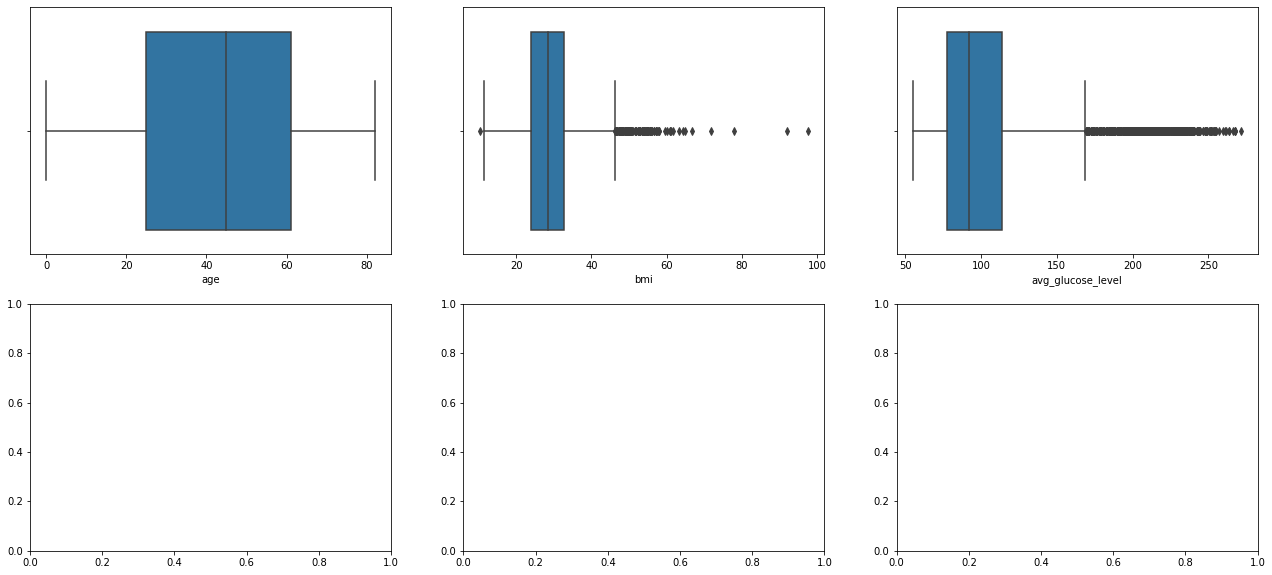

In [9]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

sns.boxplot(x=df["age"],ax=axs[0,0])
sns.boxplot(x=df["bmi"],ax=axs[0,1])
sns.boxplot(x=df["avg_glucose_level"],ax=axs[0,2])

### Visualizacion de datos

In [10]:
#Copio la base para modificar las variables y tener una mejor visualizacion
df1 = df.copy()
df1["hypertension"]     = df["hypertension"]    .map({1: "Yes",           0: "No"})
df1["stroke"]     = df["stroke"]    .map({1: "Yes",           0: "No"})
df1["heart_disease"]  = df["heart_disease"] .map({1: "Yes" ,           0: "No"})

In [11]:
def pie_graph(df,title,values):   
    labels = df[values].value_counts().index
    values = df[values].value_counts()

    fig = go.Figure(data = [
        go.Pie(
        labels = labels,
        values = values,
        hole = .5)
    ])

    fig.update_layout(title_text = title)
    fig.show()

In [12]:
pie_graph(df1, 'Distribucion de Generos','gender')

In [13]:
def age_cohort(age):
    if   age >= 0 and age <= 20:
        return "0-20"
    elif age > 20 and age <= 40:
        return "20-40"
    elif age > 40 and age <= 50:
        return "40-50"
    elif age > 50 and age <= 60:
        return "50-60"
    elif age > 60:
        return "60+"
    
df1['age group'] = df1['age'].apply(age_cohort)
df1.sort_values('age group', inplace = True)

In [14]:
pie_graph(df1,"Distribucion de edades",'age group')

In [15]:
pie_graph(df1, 'Distribucion de la Hipertension','hypertension')

In [16]:
pie_graph(df1, 'Distribucion Enfermedades Cardiovasculares','heart_disease')

In [17]:
pie_graph(df1, 'Distribucion Stroke', 'stroke')

### Variables Numericas

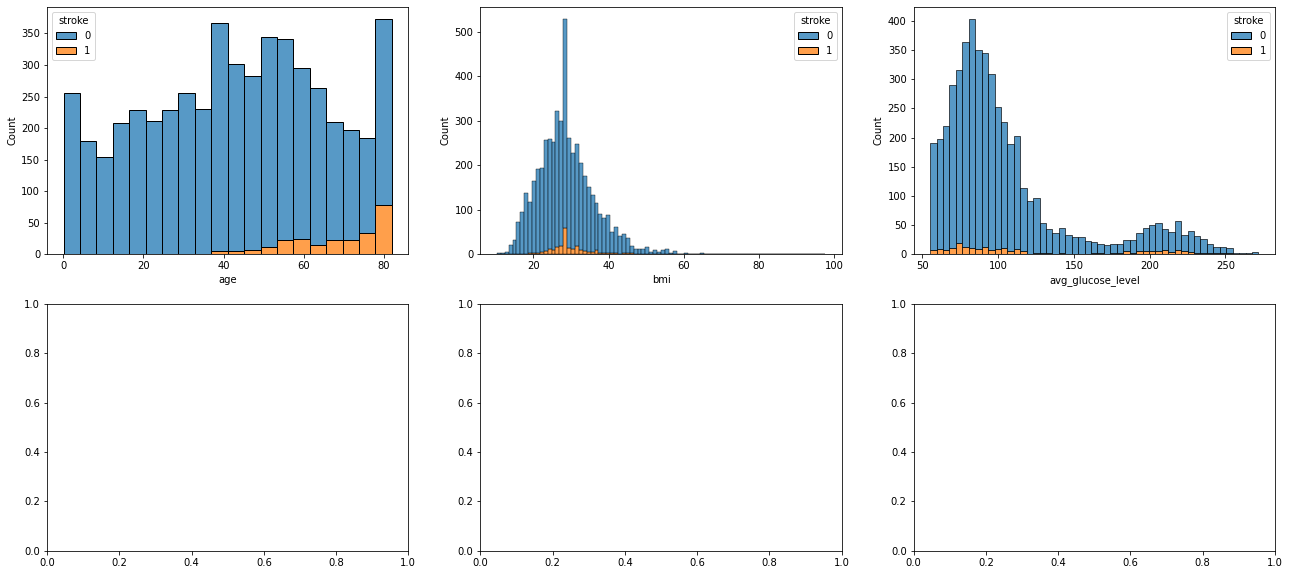

In [18]:
fig, axs = plt.subplots(2,3, figsize=(22, 10))

sns.histplot(data=df, x="age", ax=axs[0,0],multiple="stack",hue="stroke")
sns.histplot(data=df, x="bmi",  ax=axs[0,1],multiple="stack",hue="stroke")
sns.histplot(data=df, x="avg_glucose_level",  ax=axs[0,2],multiple="stack",hue="stroke")
plt.show()

In [19]:
def cnditioning_linear_plot(x,y,hue,df):
    sns.lmplot(x=x, y=y, hue=hue, data=df,
               markers=["o", "x"], palette="Set1")

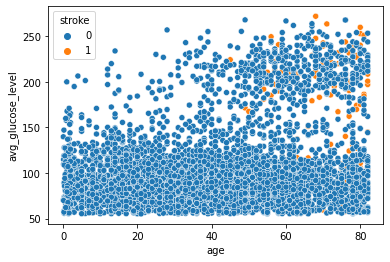

In [20]:
ax = sns.scatterplot(data=df, x="age",y ="avg_glucose_level", hue ="stroke")

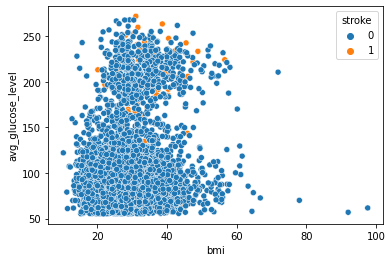

In [21]:
ax = sns.scatterplot(data=df, x="bmi",y ="avg_glucose_level", hue ="stroke")

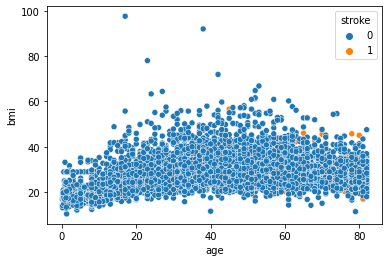

In [22]:
ax = sns.scatterplot(data=df, x="age",y ="bmi", hue ="stroke")

### Variables Categoricas

In [23]:
def bar_plot(df,x,hue,title):
    fig = sns.countplot(x=x, hue=hue, data=df)
    fig.set_title(title)

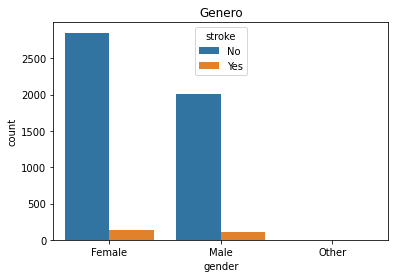

In [24]:
bar_plot(df1,'gender','stroke','Genero')

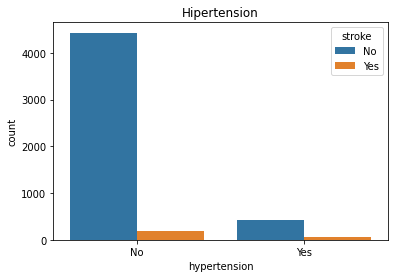

In [25]:
bar_plot(df1,'hypertension','stroke','Hipertension')

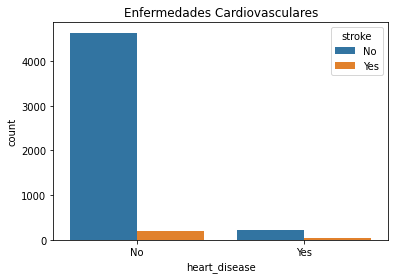

In [26]:
bar_plot(df1,'heart_disease','stroke','Enfermedades Cardiovasculares')

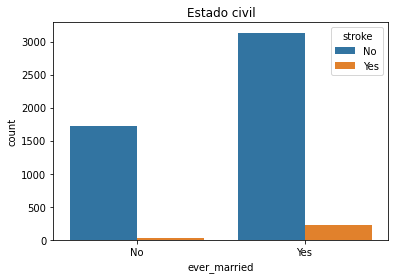

In [27]:
bar_plot(df1,'ever_married','stroke','Estado civil')

### Correlacion

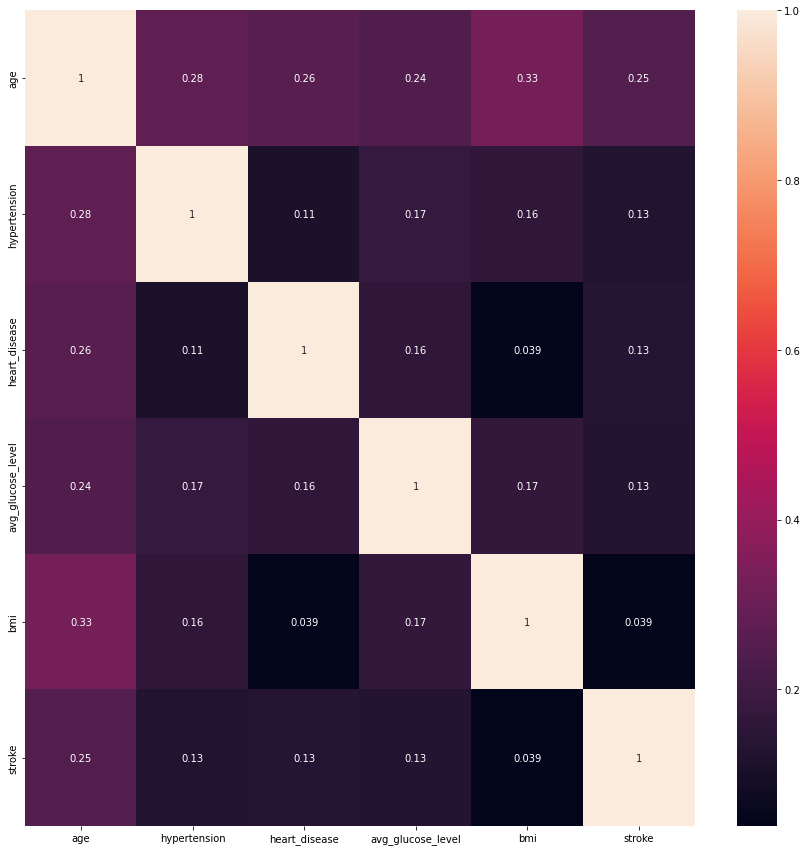

In [28]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [29]:
df.corr()['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.038947
Name: stroke, dtype: float64

### Transformacion de variables categoricas a numericas

In [30]:
from sklearn import preprocessing

In [31]:
object_col = ["gender", "ever_married" ,"Residence_type"]
label_encoder = preprocessing.LabelEncoder()
for col in object_col:
    df[col]=  label_encoder.fit_transform(df[col])

In [32]:
df.head(4)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1


In [33]:
df = pd.get_dummies(df)
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0


In [34]:
df.shape

(5110, 18)

## Separacion de train y test

In [35]:
X=df.drop(columns=['stroke'])
y=df['stroke']

In [36]:
#Separo los dato en entrenamiento y prueba para probar los algoritmos",
#Hacer particion estratificada asi no quede en un particion muy pocos datos de la particion minortiaria
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75,random_state = 0)

In [37]:
print(y_train.mean())
print(y_test.mean())

0.04801670146137787
0.05086071987480438


In [38]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(y_test.shape)

(3832, 17)
(3832,)
(1278, 17)
(1278,)


(None, None)

## Normalizado

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Balanceo

In [40]:
# check version number
import imblearn
from imblearn.over_sampling import BorderlineSMOTE, KMeansSMOTE, SVMSMOTE, SMOTE

### SMOTE

In [41]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_train.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_train.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5110, 17)
Shape of X after SMOTE:(7296, 17) 


Target Class distributuion before SMOTE:
0    0.951272
1    0.048728
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
0    0.5
1    0.5
Name: stroke, dtype: float64


## Modelos
*   Regresion Logistica
*   Random Forest
*   SVM
*   Gradient Boosting
*   KNN
*   XGBoost

## Funcion

In [42]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from scikitplot.metrics import plot_roc, plot_confusion_matrix, plot_precision_recall

In [44]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, fbeta_score, f1_score,
    matthews_corrcoef, balanced_accuracy_score,
    roc_auc_score, average_precision_score, classification_report, confusion_matrix
)

In [45]:
def f3_score(y, y_pred, beta=2):
    return fbeta_score(y, y_pred, beta=3)

def get_proba(clf, X):
    return clf.predict_proba(X)[:, 1]

def metrics_by_threshold(clf, X, y, metric_fn):
    thresholds = np.linspace(0, 1, 100)
    y_pred_proba = get_proba(clf, X)
    metrics = [metric_fn(y, y_pred_proba > t) for t in thresholds]
    return pd.DataFrame({"threshold": thresholds, "metric": metrics})

def plot_metric_by_threshold(clf, X, y, metric_fn):
    df_thresholds = metrics_by_threshold(clf, X, y, metric_fn)
    df_optimal = df_thresholds.loc[df_thresholds["metric"].idxmax()]
    optimal_threshold = df_optimal["threshold"]
    max_metric = df_optimal["metric"]
    # vertical bar at optimal threshold
    plt.axvline(x=optimal_threshold, color="r", linestyle="--")
    plt.axvline(x=0.5, color="gray", linestyle="--")
    plt.plot(df_thresholds["threshold"], df_thresholds["metric"])
    plt.xlim(0,1)
    # max value and optimal threshold in the title:
    plt.title(
        f"max {metric_fn.__name__}: {max_metric:.3f} threshold = {optimal_threshold:.3f}")

def print_metrics(clf, X, y, threshold=.5):
    y_pred_proba = get_proba(clf, X)
    y_pred = y_pred_proba > threshold
    print(f"### threshold = {threshold:.3f}")
    print(f"accuracy: {accuracy_score(y, y_pred):.3f}")
    print(f"f3: {f3_score(y, y_pred):.3f}")
    print(f"roc_auc: {roc_auc_score(y, y_pred_proba):.3f}")

def clf_diagnostic(clf, X, y, metric_fn=f3_score):
    plot_metric_by_threshold(clf, X, y, metric_fn)
    plt.show()
    df_threshold = metrics_by_threshold(clf, X, y, metric_fn)
    threshold = df_threshold.loc[df_threshold["metric"].idxmax()]["threshold"]
    print_metrics(clf, X_test, y_test, threshold)
    print_metrics(clf, X_test, y_test, 0.5)

## Regresion Logistica

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
acc = lr.score(X_test, y_test)
print("LogisticRegression accuracy score is:",acc)
report = classification_report(y_test, lr_pred)
print(report)

LogisticRegression accuracy score is: 0.7605633802816901
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      1213
           1       0.14      0.71      0.23        65

    accuracy                           0.76      1278
   macro avg       0.56      0.74      0.54      1278
weighted avg       0.94      0.76      0.83      1278



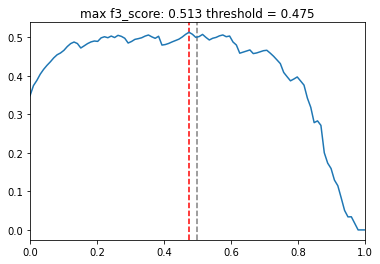

### threshold = 0.475
accuracy: 0.750
f3: 0.513
roc_auc: 0.811
### threshold = 0.500
accuracy: 0.761
f3: 0.501
roc_auc: 0.811


In [48]:
clf_diagnostic(lr, X_test, y_test)

### Hiperparametros


In [107]:
params ={
    "penalty"    : ['l2','l1','none'],
    "solver"        : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C" : [100, 10, 1, 0.1, 0.01,0.01],
}

In [105]:
params = dict()
params['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
params['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
params['C'] = [100, 10, 1, 0.1, 0.01,0.01]

In [114]:
grid_search= GridSearchCV(estimator= lr, param_grid=params, n_jobs = -1, cv=5, verbose = 0, scoring='f1')

In [116]:
grid_search.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=5, estimator=LogisticRegression(C=10), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01, 0.01],
                         'penalty': ['l2', 'l1', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [117]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

### Testeo

In [53]:
y_val_pred_proba_lr = lr.predict_proba(X_test)[:, 1]
y_val_pred = y_val_pred_proba_lr > 0.364

In [54]:
print(f"AUPRC: {average_precision_score(y_test, y_val_pred_proba_lr):.3f}")

AUPRC: 0.211


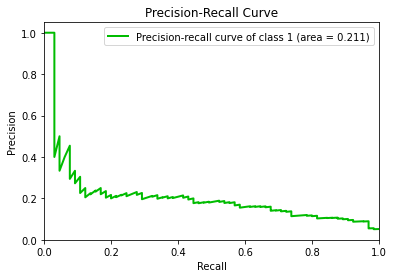

In [55]:
y_pred_lr = lr.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_lr, classes_to_plot=[1], plot_micro=False,)
plt.show()

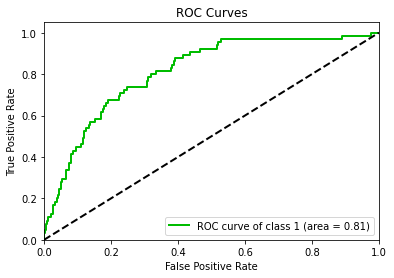

In [56]:
# plot the ROC curve
y_pred_lr = lr.predict_proba(X_test)
plot_roc(y_test, y_pred_lr, classes_to_plot=[1], plot_micro=False, plot_macro=False)
plt.show()
# NOTE exije las 2 columnas

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_val_pred).ravel()
print(f"precision = {tp / (tp + fp):.4f}")
print(f"FPR = {fp / (fp + tn):.4f}")

precision = 0.1153
FPR = 0.3289


TPR = 0.7077
FPR = 0.2366 

Accuracy score is: 0.76
The F1 score is: 0.23
The F3 score is: 0.50


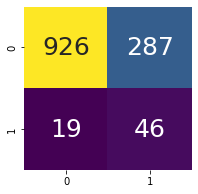

In [58]:
predictions=lr.predict(X_test)
cm = confusion_matrix( y_test , predictions )
tn, fp, fn, tp = cm.ravel()
print(f"TPR = {tp / (tp + fn):.4f}")
print(f"FPR = {fp / (fp + tn):.4f}","\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F3 score is: %.2f" % fbeta_score( y_test, predictions, beta= 3))
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

TPR = 0.7385
FPR = 0.2490 

Accuracy score is: 0.75
The F1 score is: 0.23
The F3 score is: 0.51


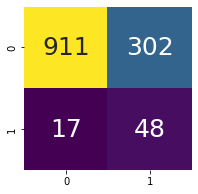

In [59]:
discrimination_threshold = 0.475
predictions = lr.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )

cm = confusion_matrix( y_test , predictions )
tn, fp, fn, tp = cm.ravel()
print(f"TPR = {tp / (tp + fn):.4f}")
print(f"FPR = {fp / (fp + tn):.4f}","\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F3 score is: %.2f" % fbeta_score( y_test, predictions, beta= 3))
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

## SVM

In [60]:
svc = SVC(probability=True,)
svc.fit(X_train, y_train)
print("SVC")
predictions=svc.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

SVC
The recall score is: 0.38
The precision score is: 0.11 

Accuracy score is: 0.81
The F1 score is: 0.17
The F2 score is: 0.26


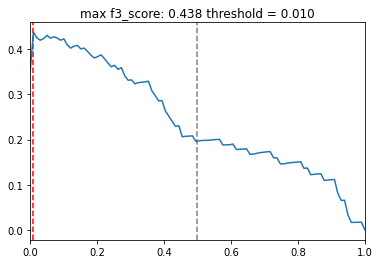

### threshold = 0.010
accuracy: 0.526
f3: 0.438
roc_auc: 0.723
### threshold = 0.500
accuracy: 0.835
f3: 0.197
roc_auc: 0.723


In [61]:
clf_diagnostic(svc, X_test, y_test)

### Testeo

In [62]:
y_val_pred_proba_svc = svc.predict_proba(X_test)[:, 1]
y_val_pred = y_val_pred_proba_svc > 0.364

In [63]:
print(f"AUPRC: {average_precision_score(y_test, y_val_pred_proba_svc):.3f}")

AUPRC: 0.109


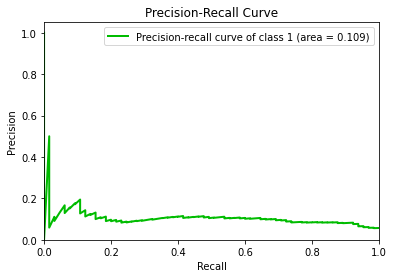

In [64]:
y_pred_svc = svc.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_svc, classes_to_plot=[1], plot_micro=False,)
plt.show()

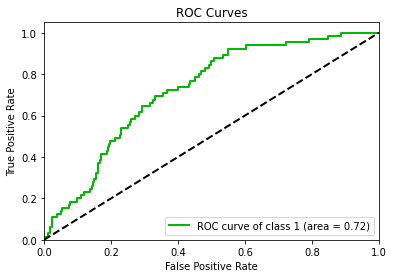

In [65]:
# plot the ROC curve
y_pred_svc = svc.predict_proba(X_test)
plot_roc(y_test, y_pred_svc, classes_to_plot=[1], plot_micro=False, plot_macro=False)
plt.show()

In [66]:
tn, fp, fn, tp = confusion_matrix(y_test, y_val_pred).ravel()
print(f"precision = {tp / (tp + fp):.4f}")
print(f"FPR = {fp / (fp + tn):.4f}")

precision = 0.1106
FPR = 0.1657


The recall score is: 0.38
The precision score is: 0.11 

Accuracy score is: 0.81
The F1 score is: 0.17
The F2 score is: 0.26


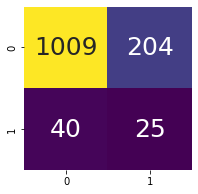

In [67]:
predictions=svc.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))
cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

The recall score is: 0.65
The precision score is: 0.10 

Accuracy score is: 0.70
The F1 score is: 0.18
The F2 score is: 0.31


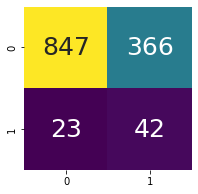

In [68]:
discrimination_threshold = 0.101
predictions = svc.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )

print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

## KNN

In [69]:
knn =KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print("KNN")
predictions=knn.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

KNN
The recall score is: 0.35
The precision score is: 0.10 

Accuracy score is: 0.80
The F1 score is: 0.15
The F2 score is: 0.23


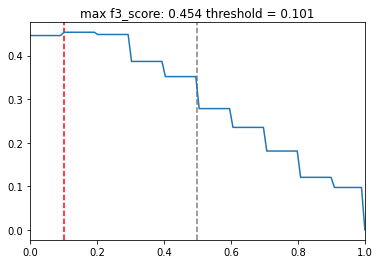

### threshold = 0.101
accuracy: 0.670
f3: 0.454
roc_auc: 0.696
### threshold = 0.500
accuracy: 0.797
f3: 0.278
roc_auc: 0.696


In [70]:
clf_diagnostic(knn, X_test, y_test)

## Gradient Boosting

In [71]:
gd = GradientBoostingClassifier()
gd.fit(X_train, y_train)
print("GradientBoostingClassifier")
predictions=gd.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

GradientBoostingClassifier
The recall score is: 0.31
The precision score is: 0.12 

Accuracy score is: 0.85
The F1 score is: 0.17
The F2 score is: 0.23


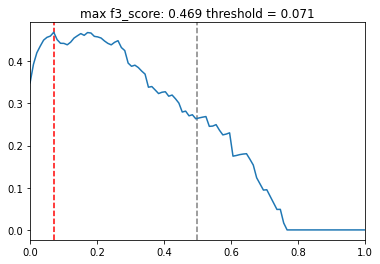

### threshold = 0.071
accuracy: 0.545
f3: 0.469
roc_auc: 0.748
### threshold = 0.500
accuracy: 0.847
f3: 0.265
roc_auc: 0.748


In [72]:
clf_diagnostic(gd, X_test, y_test)

## Random Forest

In [73]:
#RandomForest
random = RandomForestClassifier()
random.fit(X_train, y_train)
print("RandomForestClassifier")
predictions=random.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

RandomForestClassifier
The recall score is: 0.11
The precision score is: 0.10 

Accuracy score is: 0.91
The F1 score is: 0.11
The F2 score is: 0.11


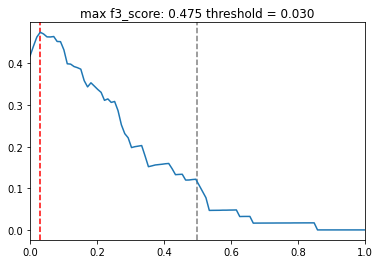

### threshold = 0.030
accuracy: 0.572
f3: 0.475
roc_auc: 0.719
### threshold = 0.500
accuracy: 0.907
f3: 0.107
roc_auc: 0.719


In [74]:
clf_diagnostic(random, X_test, y_test)

### Testeo

In [75]:
from   sklearn.metrics import accuracy_score
from   sklearn.metrics import f1_score
from   sklearn.metrics import precision_score
from   sklearn.metrics import recall_score

The recall score is: 0.11
The precision score is: 0.10 

Accuracy score is: 0.91
The F1 score is: 0.11
The F2 score is: 0.11


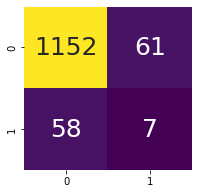

In [76]:
predictions=random.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))
cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

The recall score is: 0.72
The precision score is: 0.10 

Accuracy score is: 0.67
The F1 score is: 0.18
The F2 score is: 0.33


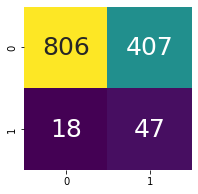

In [77]:
discrimination_threshold = 0.091
predictions = random.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

## XGBoost

In [78]:
import xgboost as xgb

In [79]:
 xgbr= xgb.XGBClassifier(colsample_bytree=0.7, gamma=0.1, leraning_rate=0.2, max_depth=11, min_child_weight=7)
 xgbr.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.7, gamma=0.1, leraning_rate=0.2, max_depth=11,
              min_child_weight=7)

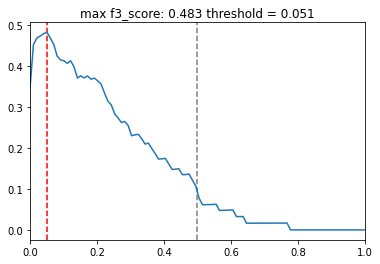

### threshold = 0.051
accuracy: 0.646
f3: 0.483
roc_auc: 0.754
### threshold = 0.500
accuracy: 0.906
f3: 0.107
roc_auc: 0.754


In [80]:
clf_diagnostic(xgbr, X_test, y_test)

### Hiperparametros

In [81]:
params ={
    "leraning_rate"    : [0.1,0.12,0.15,0.17,0.2,0.25],
    "max_depth"        : [6,7,8,9,10,11],
    "min_child_weight" : [1,3,5,7],
    "gamma"            : [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree" : [0.3, 0.4, 0.5, 0.7]
}

In [82]:
xgbr=xgb.XGBClassifier()

In [83]:
random_search= RandomizedSearchCV(xgbr, param_distributions = params, n_iter = 5, n_jobs = -1, cv=5, verbose = 0, scoring='f1_macro')

In [84]:
random_search.fit(X,y)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'leraning_rate': [0.1, 0.12, 0.15, 0.17,
                                                          0.2, 0.25],
                                        'max_depth': [6, 7, 8, 9, 10, 11],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='f1_macro')

In [85]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.2, leraning_rate=0.12, max_depth=7)

### Testeo

In [86]:
 xgbr.fit(X_train, y_train)

XGBClassifier()

In [87]:
y_val_pred_proba = xgbr.predict_proba(X_test)[:, 1]
y_val_pred = y_val_pred_proba > 0.111

In [88]:
print(f"AUPRC: {average_precision_score(y_test, y_val_pred_proba):.3f}")

AUPRC: 0.110


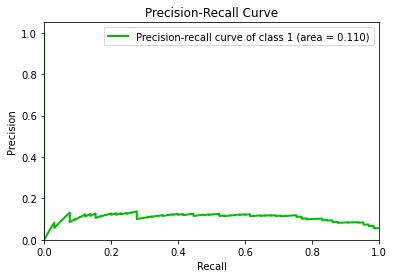

In [89]:
y_pred_ = xgbr.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_, classes_to_plot=[1], plot_micro=False,)
plt.show()

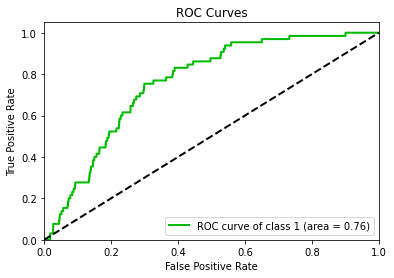

In [90]:
# plot the ROC curve
y_pred_ = xgbr.predict_proba(X_test)
plot_roc(y_test, y_pred_, classes_to_plot=[1], plot_micro=False, plot_macro=False)
plt.show()
# NOTE exije las 2 columnas

In [91]:
tn, fp, fn, tp = confusion_matrix(y_test, y_val_pred).ravel()
print(f"precision = {tp / (tp + fp):.4f}")
print(f"FPR = {fp / (fp + tn):.4f}")

precision = 0.0941
FPR = 0.4287


The recall score is: 0.35
The precision score is: 0.12 

Accuracy score is: 0.83
The F1 score is: 0.18
The F2 score is: 0.25


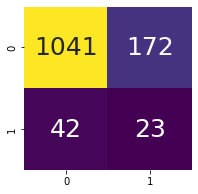

In [92]:
predictions=xgbr.predict(X_test)
print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))
cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

The recall score is: 0.88
The precision score is: 0.08 

Accuracy score is: 0.51
The F1 score is: 0.15
The F2 score is: 0.31


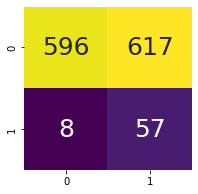

In [93]:
discrimination_threshold = 0.051
predictions = xgbr.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )

print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

In [94]:
print(
    classification_report(y_test, y_val_pred, labels=xgbr.classes_))

              precision    recall  f1-score   support

           0       0.98      0.57      0.72      1213
           1       0.09      0.83      0.17        65

    accuracy                           0.58      1278
   macro avg       0.54      0.70      0.45      1278
weighted avg       0.94      0.58      0.69      1278



## CatBoost

In [95]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 76 kB/s 


In [96]:
from catboost import CatBoostClassifier

In [97]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)
predictions=cat.predict(X_train)

Learning rate set to 0.02407
0:	learn: 0.6756319	total: 53.5ms	remaining: 53.4s
1:	learn: 0.6603881	total: 59.4ms	remaining: 29.6s
2:	learn: 0.6428688	total: 65.5ms	remaining: 21.8s
3:	learn: 0.6267557	total: 78.4ms	remaining: 19.5s
4:	learn: 0.6152072	total: 84.5ms	remaining: 16.8s
5:	learn: 0.6017721	total: 90.6ms	remaining: 15s
6:	learn: 0.5837244	total: 97ms	remaining: 13.8s
7:	learn: 0.5730588	total: 103ms	remaining: 12.8s
8:	learn: 0.5603264	total: 109ms	remaining: 12s
9:	learn: 0.5500617	total: 114ms	remaining: 11.3s
10:	learn: 0.5384759	total: 120ms	remaining: 10.8s
11:	learn: 0.5292515	total: 127ms	remaining: 10.4s
12:	learn: 0.5224224	total: 133ms	remaining: 10.1s
13:	learn: 0.5091310	total: 138ms	remaining: 9.75s
14:	learn: 0.5020086	total: 144ms	remaining: 9.46s
15:	learn: 0.4945470	total: 150ms	remaining: 9.21s
16:	learn: 0.4847918	total: 158ms	remaining: 9.11s
17:	learn: 0.4774383	total: 164ms	remaining: 8.93s
18:	learn: 0.4732748	total: 169ms	remaining: 8.75s
19:	learn: 

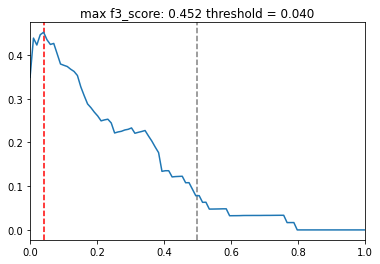

### threshold = 0.040
accuracy: 0.651
f3: 0.452
roc_auc: 0.722
### threshold = 0.500
accuracy: 0.914
f3: 0.078
roc_auc: 0.722


In [98]:
clf_diagnostic(cat, X_test, y_test)

The recall score is: 0.74
The precision score is: 0.10 

Accuracy score is: 0.65
The F1 score is: 0.18
The F2 score is: 0.33


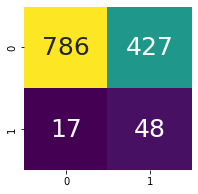

In [99]:
discrimination_threshold = 0.041
predictions = cat.predict_proba(X_test)
predictions = (predictions[::,1] > discrimination_threshold )*1

print("The recall score is: %.2f" % recall_score( y_test, predictions))
print("The precision score is: %.2f" % precision_score( y_test, predictions),"\n")
print("Accuracy score is: %.2f" % accuracy_score( y_test, predictions))
print("The F1 score is: %.2f" % f1_score( y_test, predictions))
print("The F2 score is: %.2f" % fbeta_score( y_test, predictions, beta= 2))

cm = confusion_matrix( y_test , predictions )
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 25}, fmt="d", cmap="viridis", cbar=False)
plt.show()

## Distribuciones de los scores

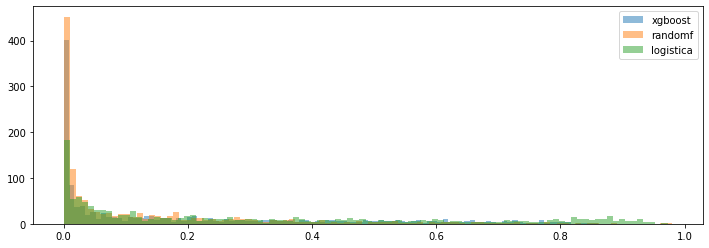

In [100]:
# density distribution of predictions of the 3 models
fig, ax = plt.subplots(figsize=(12, 4))
ax.hist(get_proba(xgbr, X_test), bins=100, label="xgboost", alpha=.5)
ax.hist(get_proba(random, X_test), bins=100, label="randomf", alpha=.5)
ax.hist(get_proba(lr, X_test), bins=100, label="logistica", alpha=.5)
plt.legend()
plt.show()